[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)

Mnist Dataset Classification

In [ ]:
 #Importing necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import cv2
import numpy as np
import pandas as pd

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

In [ ]:
from google.colab import files
image_path = list(files.upload().keys())[0]

Saving 5.jpg to 5.jpg


<div dir="rtl" style="text-align: right;">
فراخوانی کتابخانه‌های مورد نیاز و بارگذاری عکس مورد پیشگویی.
</div>

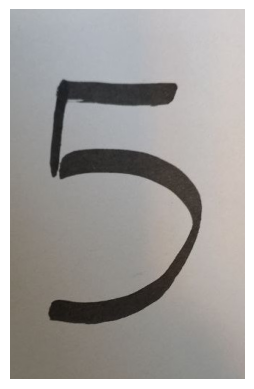

In [ ]:
# Load the image
img = mpimg.imread(image_path)

# Plot the image
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()

In [ ]:
# Load and prepare the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

11490434/11490434 [==============================] - 0s 0us/step


<div dir="rtl" style="text-align: right;">

بارگذاری و آماده سازی دیتاست <span dir="ltr">mnist</span>.

تغییر شکل و نرمال‌سازی تصاویر train و test.

ما می‌دانیم که مقادیر پیکسل برای هر تصویر در مجموعه داده اعداد صحیح بدون علامت در محدوده بین بدون رنگ و رنگ کامل یا 0 تا 255 هستند. نرمال سازی واریانس و چولگی داده‌ها را کاهش می‌دهد، که به مدل کمک می‌کند تا سریع یاد بگیرد و بهبود یابد.
</div>

In [ ]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'),
    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_initializer='he_uniform'),
    layers.Dense(10)
])

<div dir="rtl" style="text-align: right;">

  ساخت مدل شبکه عصبی پیچشی (CNN)

  در این بخش، یک مدل شبکه عصبی پیچشی با استفاده از کتابخانه <span dir="ltr">keras</span>  ساخته می‌شود که یک دنباله از لایه ها را به ترتیب اجرا کند.
   

   لایه اول، یک لایه پیچشی 2 بعدی است که 32 فیلتر در اندازه های  3*3  دارد. تابع
فعال ساز آن Relu است و از روش مقدار دهی  he_uniform استفاده می کند و ورودی لایه ابعاد 28*28 ست.

نکته: پارامتر kernel_initializer=he_uniform به معنای این است که از روش He initialization برای مقداردهی اولیه وزن‌های لایه‌های Conv2D و Dense استفاده میشود. در این روش، مقادیر وزنها از توزیع یکنواخت (uniform) با بازهی انحراف استاندارد معادل sqrt(n)/2 جهت اندازه گیری ورودی لایه به عنوان مقدار اولیه استخراج می شوند. استفاده از این روش معمولا منجر به
سرعت و کارآیی بهتری در آموزش شبکه های عصبی میشود و از(vanishing/exploding gradients) جلوگیری می کند.

لایه دوم، از عملیات اقدام Maxpooling با ابعاد 2*2 بر روی فیلترهای خروجی لایه های پیچشی استفاده می کند. که برای کاهش ابعاد تصویر می باشد.این لایه برای کاهش پیچیدگی محاسباتی و همچنین کاهش احتمال overfitting استفاده می‌شود.


   لایه سوم، نیز یک لایه پیچشی 2 بعدی است که 64 فیلتر در اندازه های  3*3  دارد که ویژگی‌های بیشتری را از تصویر استخراج می‌کند. تابع
فعال ساز آن Relu است و از روش مقدار دهی  he_uniform استفاده می کند.

لایه چهارم، مانند لایه دوم است که دوباره ابعاد تصویر را کاهش می‌دهد.

لایه پنجم، مانند لایه سوم است.

لایه ششم، این لایه (Flatten) باعث تغییر ابعاد خروجی لایه های پیچشی به شکلی مناسب برای لایه های متصل می شود. یعنی خروجی سه بعدی لایه‌های پیچشی را به یک بردار یک بعدی تبدیل می‌کند. این لایه ورودی را برای لایه‌های متراکم dense آماده می‌کند.

لایه هفتم،
لایه Dense با ابعاد 64 و تابع فعالسازی ReLU به معنای این است که یک لایه‌ با 64 نود است که هر نود به تمامی نودهای لایه قبلی متصل است و تابع فعال‌ساز Relu در انتهای مدل اضافه شده است.

لایه هشتم، لایه Dense با ابعاد 10 و تابع فعالسازی softmax به معنای این است که در انتهای مدل یک لایه کاملاً متصل با 10 نود￼که هر نود نماینده یکی از کلاس‌های ارقام ۰ تا ۹ است
و تابع فعالسازی softmax برای انجام دسته‌بندی چندگانه استفاده شده است و بطور خودکار در زمان محاسبه loss اعمال می‌شود.

 تابع softmax ورودیهای عددی را به یک توزیع￼
احتمال تبدیل میکند که مقادیر خروجی مربوط به کلاسهای مختلف احتمال وقوع آنها را نمایش میدهد و مجموع این احتمالات برابر￼￼
با 1 است.
</div>

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["sparse_categorical_accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

<div dir="rtl" style="text-align: right;">

در این بخش خلاصه مدل را داریم.

همانطور که مشاهده می کنید، در جدول بالا بعد و تعداد پارامترهای هر مرحله از مدل پیچشی را داریم. در قسمت قبل توضیحاتی در مورد هر لایه و بعد آن داشتیم. مشاهده می کنیم لایه اول <span dir="ltr">conv2d</span> دارای ۳۲۰ پارامتر و لایه سوم <span dir="ltr">conv2d_1</span> دارای ۱۸۴۹۶ پارامتر و لایه پنجم <span dir="ltr">conv2d_2</span> دارای ۳۶۹۲۸ پارامتر و لایه هفتم <span dir="ltr">dense</span> دارای ۳۶۹۲۸ پارامتر و در نهایت لایه هشتم <span dir="ltr">dense_1</span> دارای ۶۵۰ پارامتر می‌باشند.

لذا تعداد کل پارامترهای مدل برابر با ۹۳۳۲۲ پارامتر می‌باشد که همه آنها آموزش پذیر می‌باشند.

</div>


In [ ]:
# Train the model
model.fit(train_images, train_labels, epochs=5)

# Save the model
model.save('mnist_model.h5')

Epoch 1/5
1875/1875 [==============================] - 58s 30ms/step - loss: 0.1331 - sparse_categorical_accuracy: 0.9593
Epoch 2/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0454 - sparse_categorical_accuracy: 0.9862
Epoch 3/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0322 - sparse_categorical_accuracy: 0.9899
Epoch 4/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0246 - sparse_categorical_accuracy: 0.9922
Epoch 5/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0192 - sparse_categorical_accuracy: 0.9939


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<div dir="rtl" style="text-align: right;">
استفاده از بهینه‌ساز Adam که یکی از الگوریتم‌های بهینه‌سازی کارآمد برای یادگیری مدل‌های شبکه عصبی است.

پارامتر <span dir="ltr">loss="sparse_categorical_crossentropy</span> این پارامتر تابع هزینه (loss function) را تعیین می‌کند.
تابع هزینه که برای دسته‌بندی ارقام به کار می‌رود. این تابع هزینه برای مشکلات چندکلاسه مناسب است.

در مسائل دسته‌بندی چنددسته‌ای (multiclass classification)، از تابع هزینه‌ی <span dir="ltr">sparse_categorical_crossentropy</span> استفاده می‌شود. تابع هزینه‌ی <span dir="ltr">sparse_categorical_crossentropy</span> برای
مسائلی که برچسب‌ها به صورت اعداد صحیح (integer) مشخص شده‌اند، مناسب است. برای استفاده از این تابع هزینه، باید برچسب‌ها
به شکل اعداد صحیح (integer) باشند و نیازی به تبدیل آنها به <span dir="ltr">one-hot encoding</span> نیست.

<span dir="ltr">metrics=["sparse_categorical_accuracy</span> این پارامتر معیارهای ارزیابی مدل را تعیین می‌کند، در اینجا، از معیار
دقت (accuracy) برای ارزیابی استفاده شده است.

(model.fit)آموزش مدل با داده‌های آموزشی و برچسب‌های آنها ،(epoch) تعداد دورهای آموزشی که مدل بر روی داده‌ها آموزش می‌بیند(آپدیت و بهینه کردن وزن ها).

تعداد (epoch) را در این مدل برابر ۵ قرار داده‌ایم.و مقادیر (loss) و (accuracy) را در هر بار از براورد وزن ها برای داده‌های (train)مشاهده می‌کنید.

validation_data=(test_images, test_labels) داده‌های اعتبارسنجی که برای ارزیابی عملکرد مدل در هر دور آموزشی استفاده می‌شود.
</div>


In [ ]:
test_loss,test_accuracy = model.evaluate(test_images, test_labels)

print('accuracy : ', test_accuracy)
print('loss : ', test_loss)

313/313 [==============================] - 3s 11ms/step - loss: 0.0624 - sparse_categorical_accuracy: 0.9816
accuracy :  0.9815999865531921
loss :  0.062389422208070755


<div dir="rtl" style="text-align: right;">

در این بخش صحت و خطای مدل را روی داده‌های تست مشاهده میکنیم. مشاهده میکنید صحت مدل ۰/۹۸۱۶ می‌باشد.
</div>

In [ ]:
# Make predictions on the test set
test_predictions = model.predict(test_images)

# Convert the logits to class labels
test_predictions_labels = np.argmax(test_predictions, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_labels, test_predictions_labels)

# Print the confusion matrix
print(f"Confusion matrix:\n{cm}")

# Calculate accuracy score on test set
accuracy_score = accuracy_score(test_labels, test_predictions_labels)
print('accuracy score: ', accuracy_score)
print('accuracy in percentage: ',int(accuracy_score*100),'%')
print(classification_report(test_labels, test_predictions_labels))

313/313 [==============================] - 3s 9ms/step
Confusion matrix:
[[ 980    0    0    0    0    0    0    0    0    0]
 [   1 1124    3    1    1    0    3    0    2    0]
 [   2    1 1021    1    2    0    2    3    0    0]
 [   1    0    2 1002    0    3    0    0    2    0]
 [   0    0    1    0  966    0    3    0    8    4]
 [   2    0    0    6    0  879    1    0    4    0]
 [   8    0    0    1    0    1  947    0    1    0]
 [   2    2   18    2    0    1    0 1000    2    1]
 [   3    0    5    0    0    0    0    0  965    1]
 [  10    0    1    8    0   13    0    3   42  932]]
accuracy score:  0.9816
accuracy in percentage:  98 %
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.98      0.99      0.99      1010
           4       1.00      0.98      0.99       982
           5     

<div dir="rtl" style="text-align: right;">

در بخش test_predictions، مدل آموزش دیده بر روی تصاویر تست پیش‌بینی انجام می‌دهد.

model.predict(test_images): این تابع پیش‌بینی مدل را بر روی داده‌های ورودی test_images انجام می‌دهد و مقادیر خروجی (logits) را برای هر تصویر بازمی‌گرداند. این مقادیر، احتمال‌های هر کلاس (عدد از 0 تا 9) برای هر تصویر هستند.

در بخش test_predictions_labels، مقادیر logits به برچسب‌های کلاسی تبدیل می‌شوند.

np.argmax(test_predictions, axis=1): این تابع، شاخص (ایندکس) بیشترین مقدار را در طول محور 1 (که نشان‌دهنده‌ی کلاس‌های مختلف است) بازمی‌گرداند. به عبارت دیگر، برای هر تصویر، کلاسی را که بالاترین احتمال را دارد انتخاب می‌کند.

در بخش cm، ماتریس درهم‌ریختگی محاسبه می‌شود تا عملکرد مدل در تشخیص صحیح کلاس‌ها بررسی شود.

confusion_matrix(test_labels, test_predictions_labels): این تابع از کتابخانه‌ی sklearn، ماتریس درهم‌ریختگی را محاسبه می‌کند. ماتریس درهم‌ریختگی نشان می‌دهد که مدل در تشخیص هر کلاس چقدر موفق بوده است و تعداد پیش‌بینی‌های صحیح و غلط را برای هر کلاس مشخص می‌کند.

در بخش accuracy_score، دقت مدل بر روی مجموعه تست محاسبه می‌شود.

accuracy_score = accuracy_score(test_labels, test_predictions_labels): این تابع، دقت مدل را محاسبه می‌کند. دقت به عنوان نسبت تعداد پیش‌بینی‌های صحیح به کل تعداد نمونه‌ها تعریف می‌شود.

و در انتها گزارش طبقه‌بندی برای هر کلاس چاپ می‌شود.

 classification_report(test_labels, test_predictions_labels): این تابع از کتابخانه‌ی sklearn، گزارش طبقه‌بندی را چاپ می‌کند که شامل معیارهایی مانند precision (دقت)، recall (بازخوانی) و F1-score برای هر کلاس می‌شود.

</div>

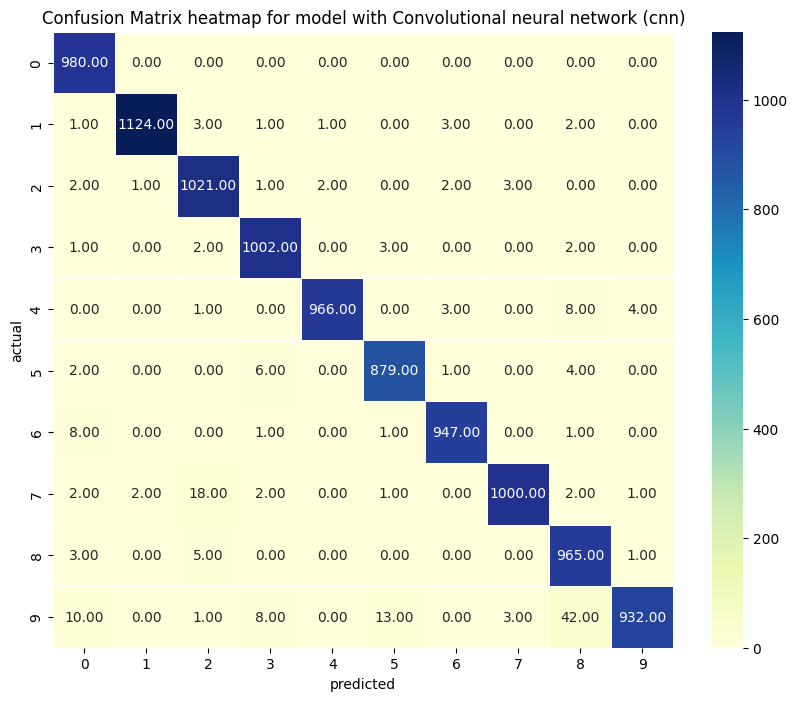

In [ ]:
# Plot confusion matrix for model with Convolutional neural network (cnn)
conf_mat= pd.crosstab(test_labels, test_predictions_labels, rownames=['actual'], colnames=['predicted'])
fig , ax = plt.subplots(figsize = (10 , 8))
ax = sns.heatmap(conf_mat , annot=True , linewidths=0.5 , fmt="0.2f" , cmap="YlGnBu")
plt.title('Confusion Matrix heatmap for model with Convolutional neural network (cnn)')
plt.show()

In [ ]:
def predict_digit(image_path):
    # Load the trained model
    model = tf.keras.models.load_model('mnist_model.h5')

    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Resize the image to 28x28 pixels
    img = cv2.resize(img, (28, 28))
    # Invert the colors (black background, white digit)
    img = cv2.bitwise_not(img)
    # Normalize the image
    img = img.astype('float32') / 255.0
    # Reshape the image to match the input shape of the model
    img = img.reshape(1, 28, 28, 1)
    # Predict the digit
    prediction = model.predict(img)
    digit = np.argmax(prediction)
    return digit

# Example usage
predicted_digit = predict_digit(image_path)
print(f'The predicted digit is: {predicted_digit}')

1/1 [==============================] - 0s 80ms/step
The predicted digit is: 5


<div dir="rtl" style="text-align: right;">

predict_digit تابعی است برای پیش‌بینی عددی که در یک تصویر دست‌نویس قرار دارد استفاده می‌شود.

image_path: مسیر فایل تصویری که می‌خواهید پیش‌بینی کنید.

در بخش model، مدل آموزش‌دیده ذخیره‌شده بارگذاری می‌شود.

tf.keras.models.load_model('mnist_model.h5'): این دستور مدل ذخیره‌شده با نام mnist_model.h5 را بارگذاری می‌کند. این مدل قبلاً آموزش داده شده و ذخیره شده است.

در بخش img = cv2.imread، تصویر ورودی بارگذاری می‌شود.

cv2.imread(image_path, cv2.IMREAD_GRAYSCALE): این تابع از کتابخانه OpenCV تصویر را در حالت خاکستری (gray scale) بارگذاری می‌کند.

cv2.resize(img, (28, 28)): این تابع اندازه تصویر را به 28x28 پیکسل تغییر می‌دهد.

cv2.bitwise_not(img): این تابع رنگ‌های تصویر را معکوس می‌کند.

img.astype('float32') / 255.0: این دستور مقادیر پیکسل‌های تصویر را به نوع داده float32 تبدیل کرده و سپس مقادیر را به محدوده [0, 1] نرمال‌سازی می‌کند.

img.reshape(1, 28, 28, 1): این دستور شکل تصویر را به (1, 28, 28, 1) تغییر می‌دهد، که به معنای یک نمونه تصویر با ابعاد 28x28 و یک کانال رنگی (خاکستری) است.

model.predict(img): این تابع پیش‌بینی مدل را برای تصویر ورودی انجام می‌دهد و مقادیر احتمال را برای هر کلاس (عدد از 0 تا 9) بازمی‌گرداند.

np.argmax(prediction): این تابع شاخص (ایندکس) بیشترین مقدار احتمال را در طول محور 1 بازمی‌گرداند، که نشان‌دهنده عدد پیش‌بینی شده است.


</div>

<div dir="rtl" style="text-align: right;">

در نهایت مشاهده می‌کنید که مدل شبکه عصبی ، عکس بارگذاری شده عدد مورد نظر ما (۵) را درست پی بینی کرده است.
</div>